# ライブラリ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データ読み込み

In [2]:
df = pd.read_csv('../processing_data/merged.csv', encoding='shift_jis')
# '商品価格'列が500,000以上の行を削除
df = df[df['商品価格'] < 500000]

In [3]:
print(df.columns)

Index(['日付', '店舗ID', '商品ID', '商品価格', '売上個数', '売上', '商品カテゴリID', '商品カテゴリ名',
       '商品カテゴリ', '商品名', '曜日', '年', '月', '日', '四半期', '週', '平日/休日'],
      dtype='object')


In [4]:
print(df['商品カテゴリ'].unique())

['映画' 'ゲーム' 'ギフト' '音楽' 'PCゲーム' '本' 'ゲーム周辺機器' 'PCソフト']


In [5]:
# ギフトの売上推移
gift_sales_trend = df[df['商品カテゴリ'] == 'ギフト'].groupby('日付')['売上'].sum()

# 他のカテゴリの売上推移
other_sales_trend = df[df['商品カテゴリ'] != 'ギフト'].groupby('日付')['売上'].sum()

print(gift_sales_trend)
print(other_sales_trend)

日付
2018-01-01    116640
2018-01-02    481820
2018-01-03    511460
2018-01-04    350110
2018-01-05    372800
               ...  
2019-10-27    221050
2019-10-28    284580
2019-10-29    248650
2019-10-30    276800
2019-10-31    303030
Name: 売上, Length: 669, dtype: int64
日付
2018-01-01     844540
2018-01-02    3865580
2018-01-03    3316060
2018-01-04    3152480
2018-01-05    2923510
               ...   
2019-10-27     932690
2019-10-28    1029080
2019-10-29    1002350
2019-10-30     967060
2019-10-31    1292030
Name: 売上, Length: 669, dtype: int64


In [6]:
# 必要な特徴を選択（例：売上と販売個数）
features = df[['売上', '売上個数']]

# クラスタリングの実行
kmeans = KMeans(n_clusters=5)
df['クラスター'] = kmeans.fit_predict(features)

# ギフトと同じクラスターに属する商品の確認
gift_cluster = df[df['商品カテゴリ'] == 'ギフト']['クラスター'].mode()[0]
similar_to_gift = df[df['クラスター'] == gift_cluster]

print(similar_to_gift)

c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 日付  店舗ID     商品ID  商品価格  売上個数    売上  商品カテゴリID      商品カテゴリ名   
0        2018-01-01     6  1000001   420     1   420       100     映画 - DVD  \
2        2018-01-01     7  2200016   510     1   510       220  ゲーム - ゲーム機A   
5        2018-01-01     6  1000408   680     2  1360       100     映画 - DVD   
6        2018-01-01    15  1200448   190     1   190       120     音楽 - その他   
7        2018-01-01     0  1000414   250     1   250       100     映画 - DVD   
...             ...   ...      ...   ...   ...   ...       ...          ...   
1119564  2019-10-31     2  1500057  1700     1  1700       150  ゲーム - ゲーム機B   
1119566  2019-10-31     7  1100443  1020     1  1020       110  PCゲーム - 通常版   
1119567  2019-10-31     8  1600060  1020     1  1020       160  ギフト - 小型ゲーム   
1119568  2019-10-31     3  1002540   680     1   680       100     映画 - DVD   
1119569  2019-10-31     7  1100450  1530     1  1530       110  PCゲーム - 通常版   

        商品カテゴリ    商品名        曜日     年   月   日  四半期 

- ギフトの売り上げ推移

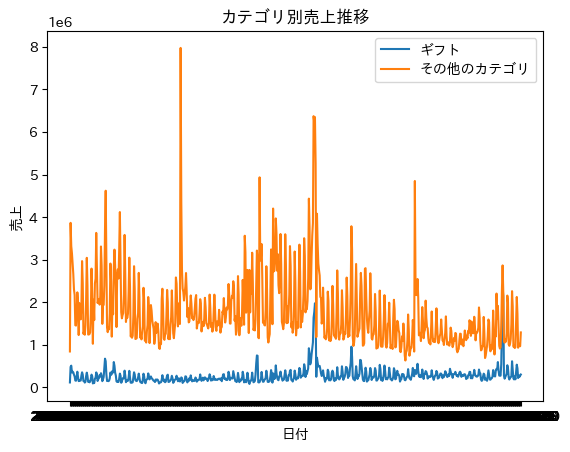

In [7]:
# ギフトの売上推移の集計
gift_sales_trend = df[df['商品カテゴリ'] == 'ギフト'].groupby('日付')['売上'].sum()

# 他のカテゴリの売上推移の集計
other_sales_trend = df[df['商品カテゴリ'] != 'ギフト'].groupby('日付')['売上'].sum()

# グラフで比較
plt.plot(gift_sales_trend, label='ギフト')
plt.plot(other_sales_trend, label='その他のカテゴリ')
plt.title('カテゴリ別売上推移')
plt.xlabel('日付')
plt.ylabel('売上')
plt.legend()
plt.show()

# 各商品カテゴリとギフトの売り上げ推移

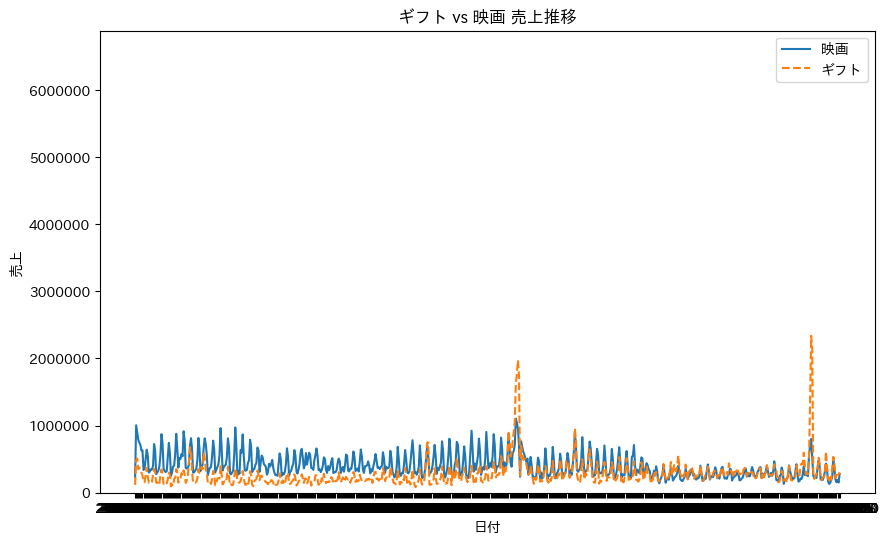

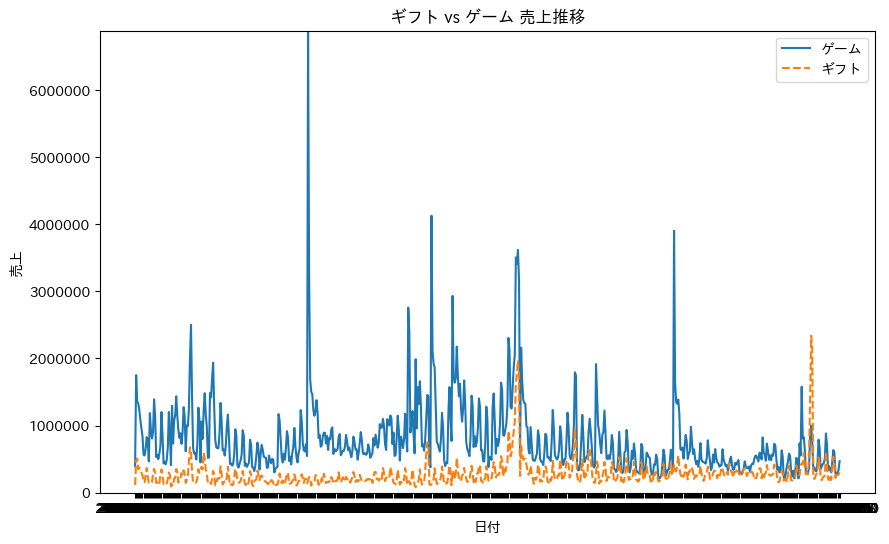

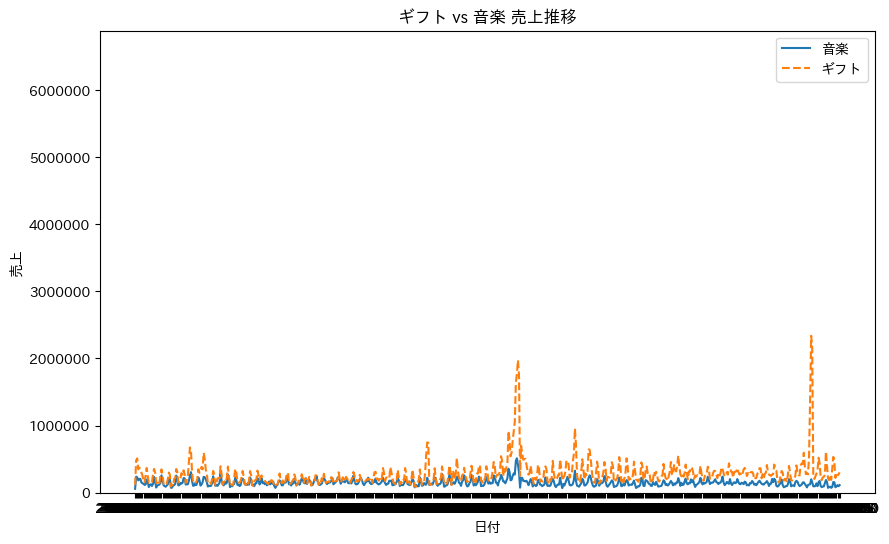

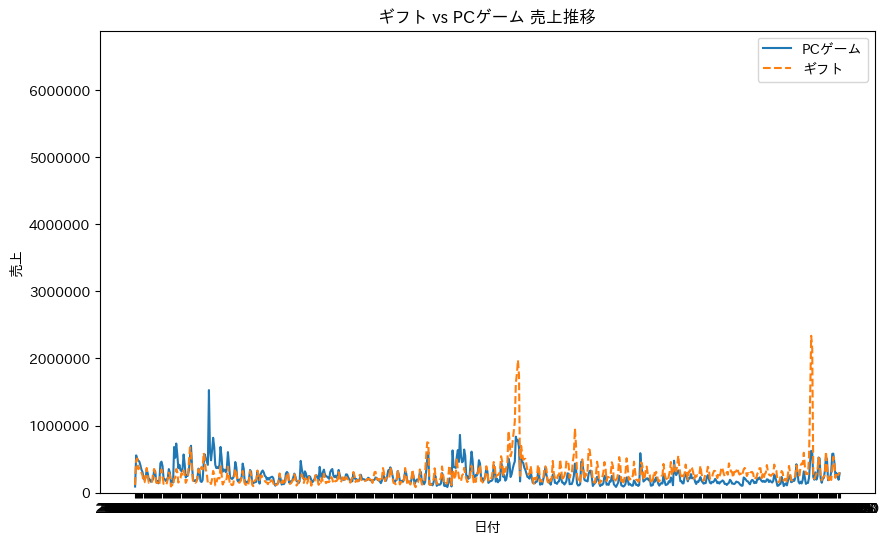

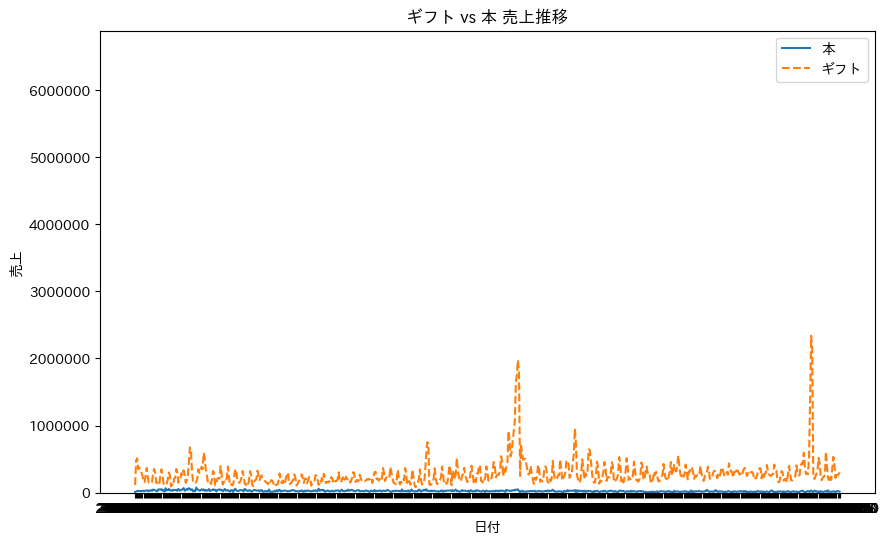

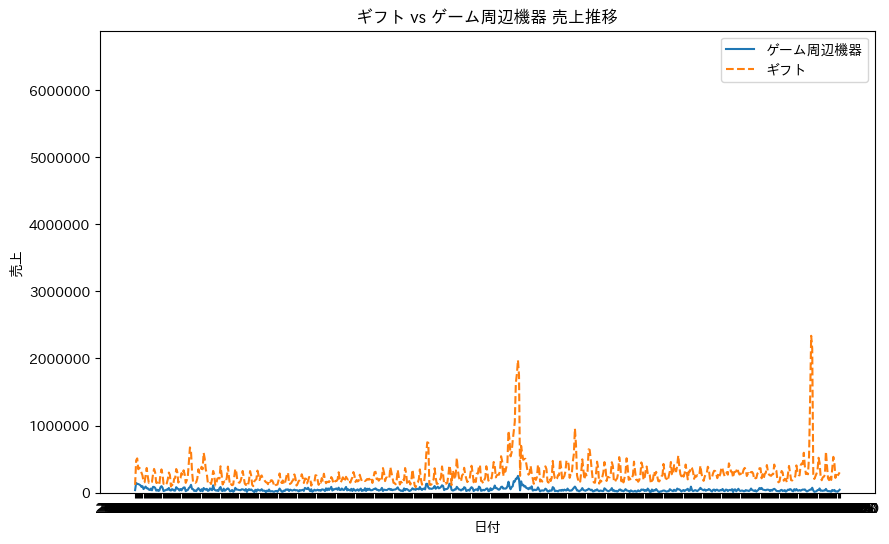

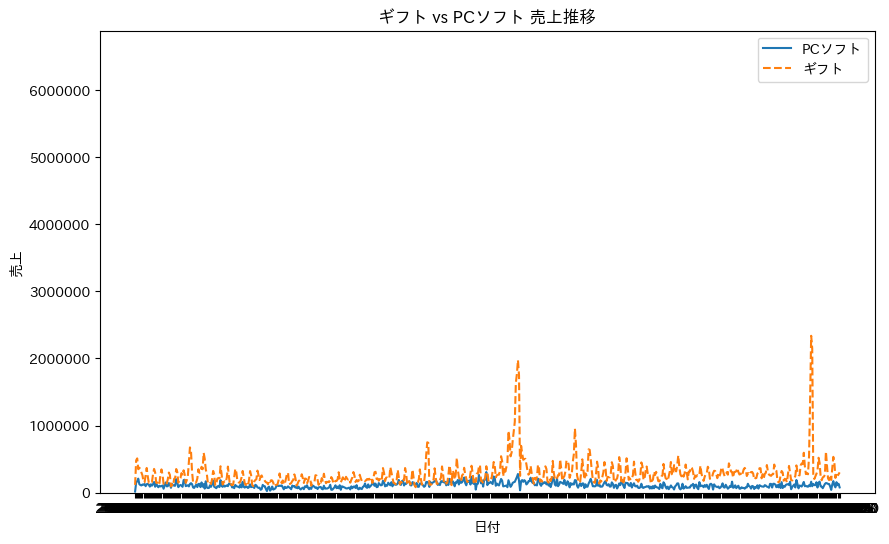

In [8]:
# 全カテゴリの売上の最大値を取得
max_sales = df.groupby(['商品カテゴリ', '日付'])['売上'].sum().max()

# 商品カテゴリごとにグラフを作成
for category in df['商品カテゴリ'].unique():
    if category != 'ギフト':
        # 現在のカテゴリの売上推移
        category_sales_trend = df[df['商品カテゴリ'] == category].groupby('日付')['売上'].sum()

        # ギフトの売上推移
        gift_sales_trend = df[df['商品カテゴリ'] == 'ギフト'].groupby('日付')['売上'].sum()

        # グラフの作成
        plt.figure(figsize=(10, 6))
        plt.plot(category_sales_trend, label=f'{category}')
        plt.plot(gift_sales_trend, label='ギフト', linestyle='--')

        # Y軸の範囲を統一
        plt.ylim(0, max_sales)

        # Y軸のラベルを通常の数値表記に変更
        plt.ticklabel_format(style='plain', axis='y')

        # タイトルとラベル
        plt.title(f'ギフト vs {category} 売上推移')
        plt.xlabel('日付')
        plt.ylabel('売上')

        # 凡例
        plt.legend()

        # グラフの表示
        plt.show()

# ギフトと同じ形候補を探す

映画、ゲーム、PCゲームが形似ている？

- ギフトの中身確認

In [9]:
# '商品カテゴリ名'が'ギフト'である行をフィルタリングし、'商品名'のユニークな値を抽出
gift_product_names = df[df['商品カテゴリ'] == 'ギフト']['商品名'].unique()

# 結果の表示
print(gift_product_names)

['ボードゲーム' 'カード、パズル等' 'フィギュア' '小型ゲーム' 'ガジェット類' '記念品_タイプB' '記念品_タイプA'
 'ぬいぐるみ']


- ギフト各商品内で比較

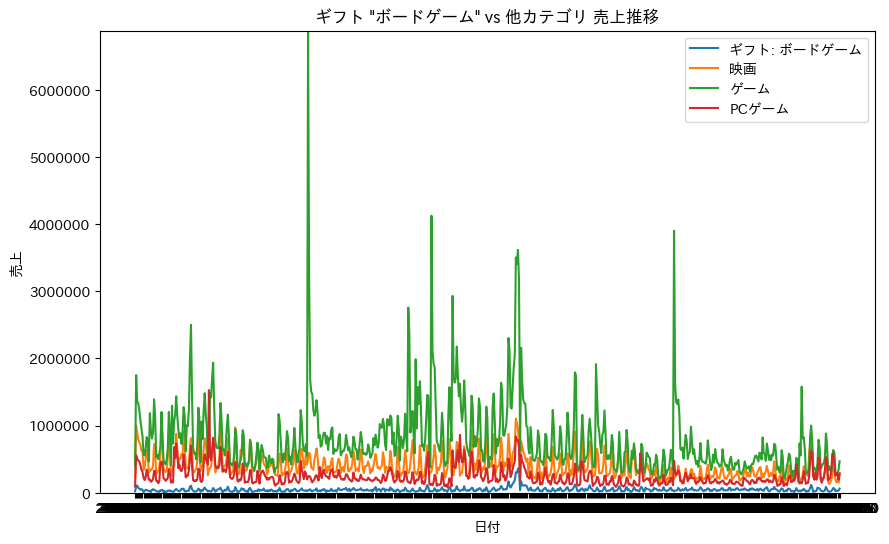

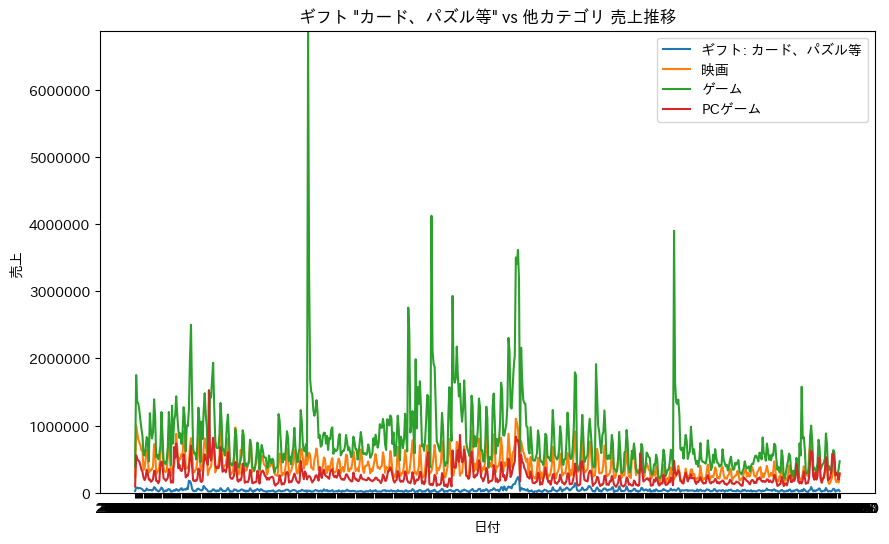

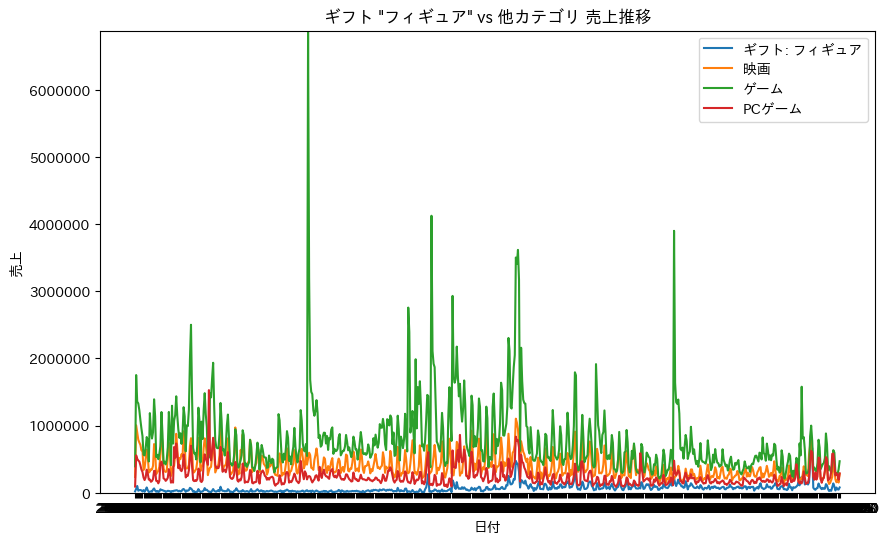

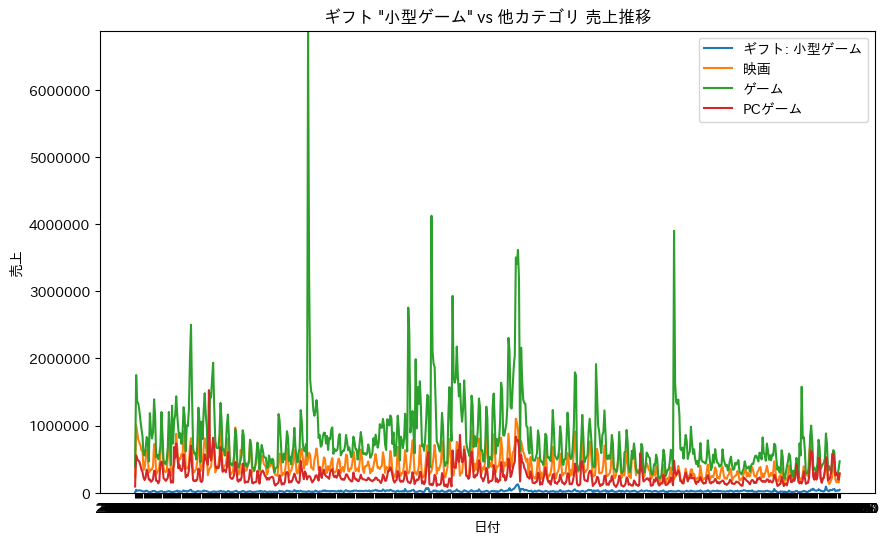

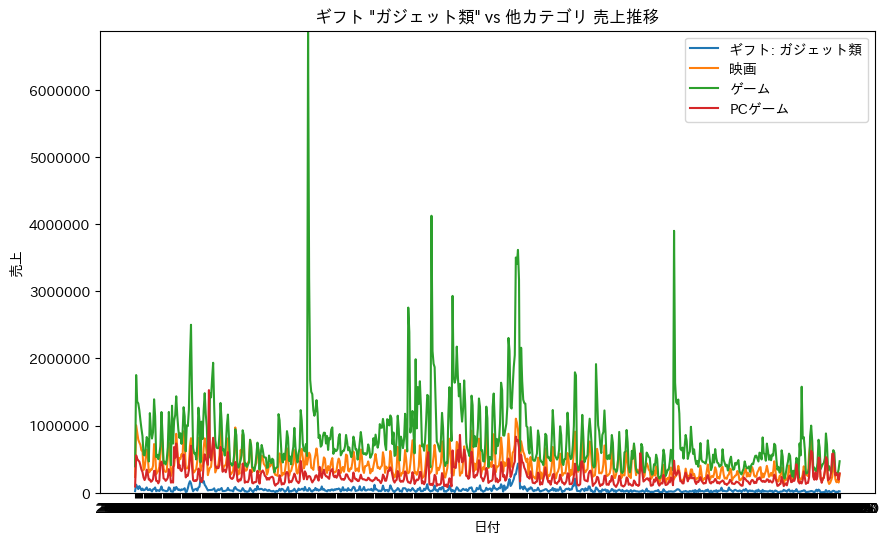

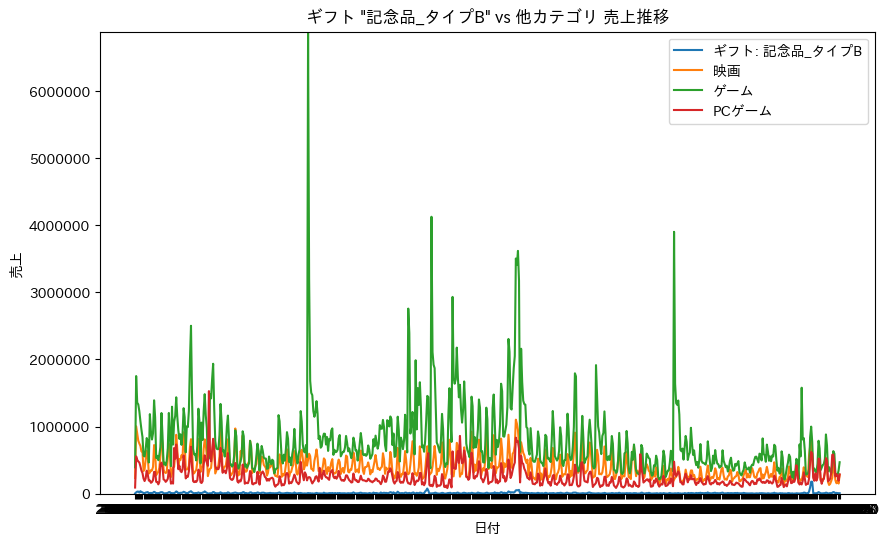

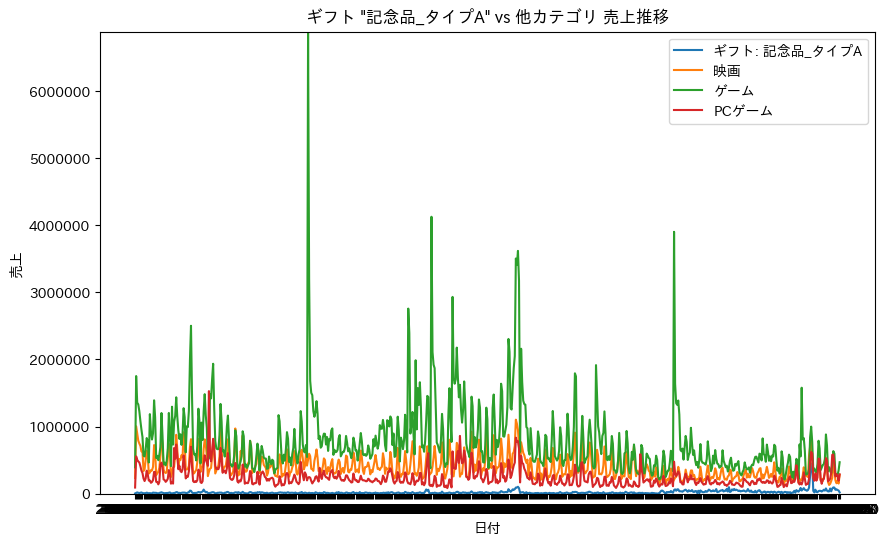

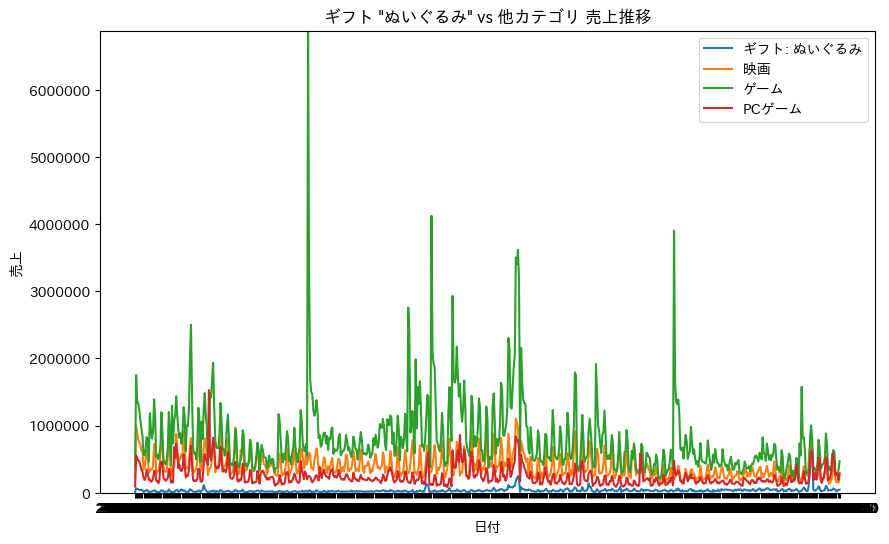

In [10]:
# 比較するカテゴリのリスト
compare_categories = ['映画', 'ゲーム', 'PCゲーム']

# ギフトカテゴリ内の各商品名のリストを取得
gift_product_names = df[df['商品カテゴリ'] == 'ギフト']['商品名'].unique()

# 全カテゴリの売上の最大値を取得
max_sales = df.groupby(['商品カテゴリ', '日付'])['売上'].sum().max()

# ギフトカテゴリ内の各商品名ごとにグラフを作成
for product_name in gift_product_names:
    # 現在の商品の売上推移
    product_sales_trend = df[(df['商品カテゴリ'] == 'ギフト') & (df['商品名'] == product_name)].groupby('日付')['売上'].sum()

    # グラフの作成
    plt.figure(figsize=(10, 6))
    plt.plot(product_sales_trend, label=f'ギフト: {product_name}')

    # 指定された各カテゴリと比較
    for category in compare_categories:
        category_sales_trend = df[df['商品カテゴリ'] == category].groupby('日付')['売上'].sum()
        plt.plot(category_sales_trend, label=category)

    # Y軸の範囲を統一
    plt.ylim(0, max_sales)

    # Y軸のラベルを通常の数値表記に変更
    plt.ticklabel_format(style='plain', axis='y')

    # タイトルとラベル
    plt.title(f'ギフト "{product_name}" vs 他カテゴリ 売上推移')
    plt.xlabel('日付')
    plt.ylabel('売上')

    # 凡例
    plt.legend()

    # グラフの表示
    plt.show()

    plt.show()


- 映画、ゲーム、PCゲームの各商品との比較

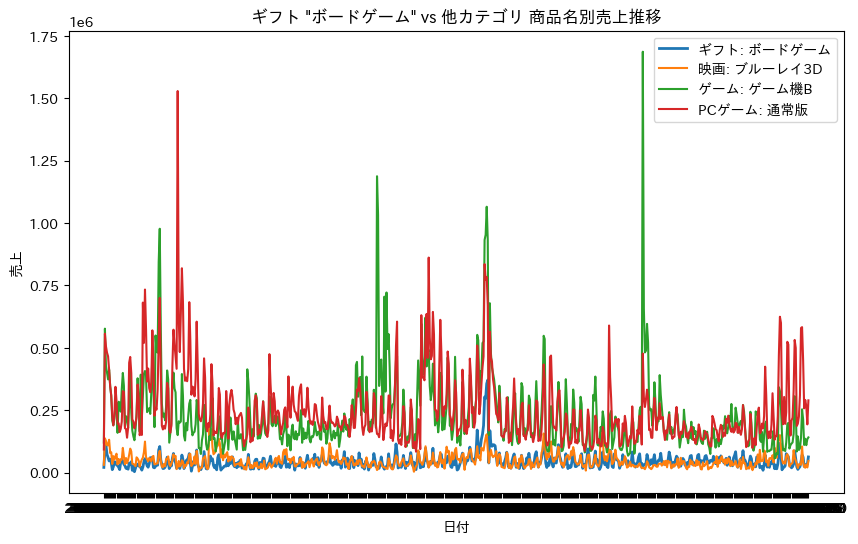

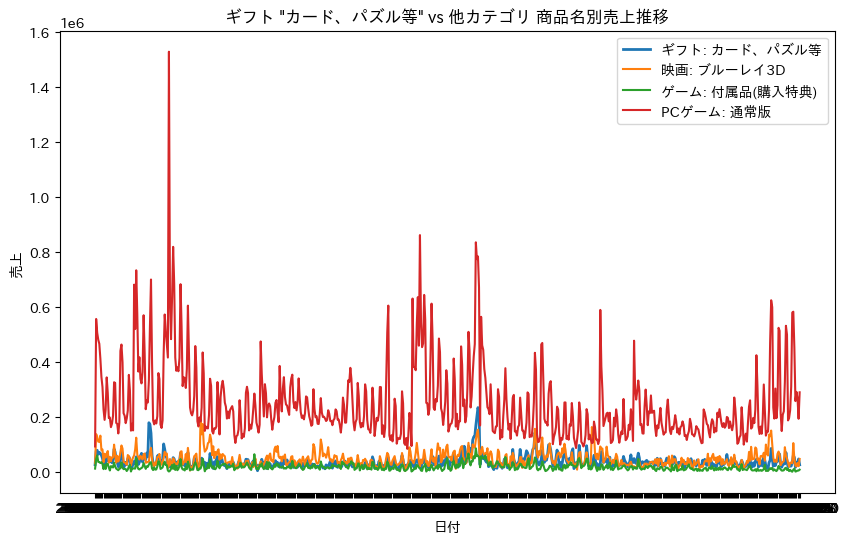

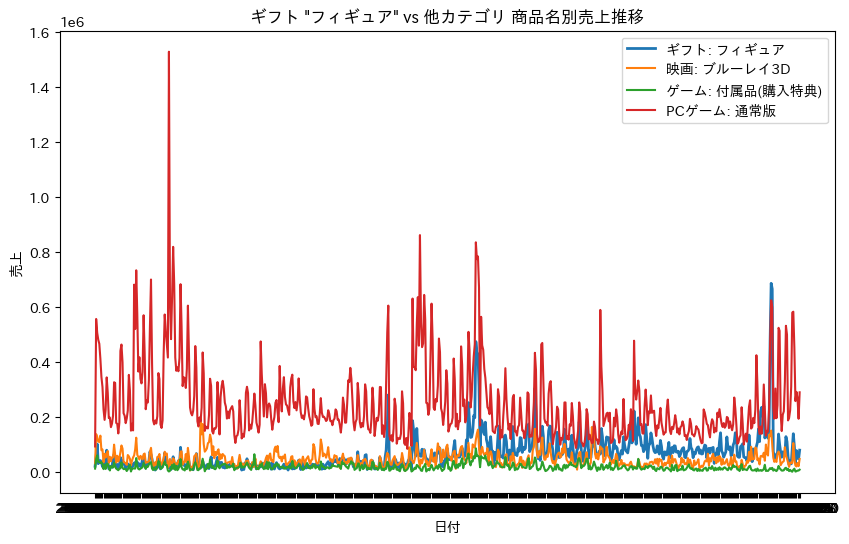

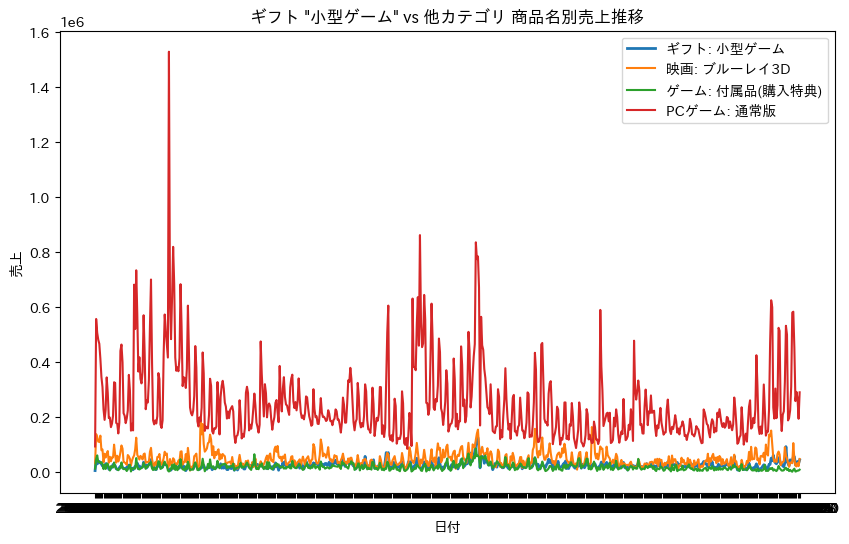

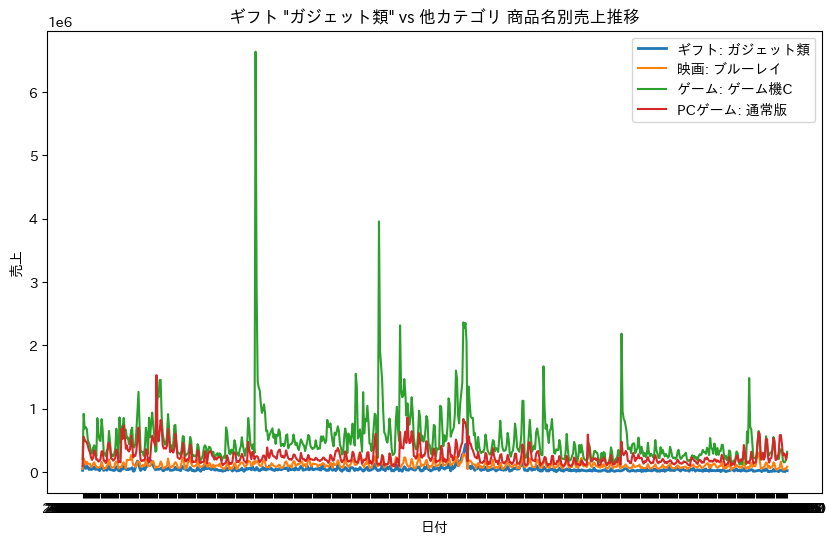

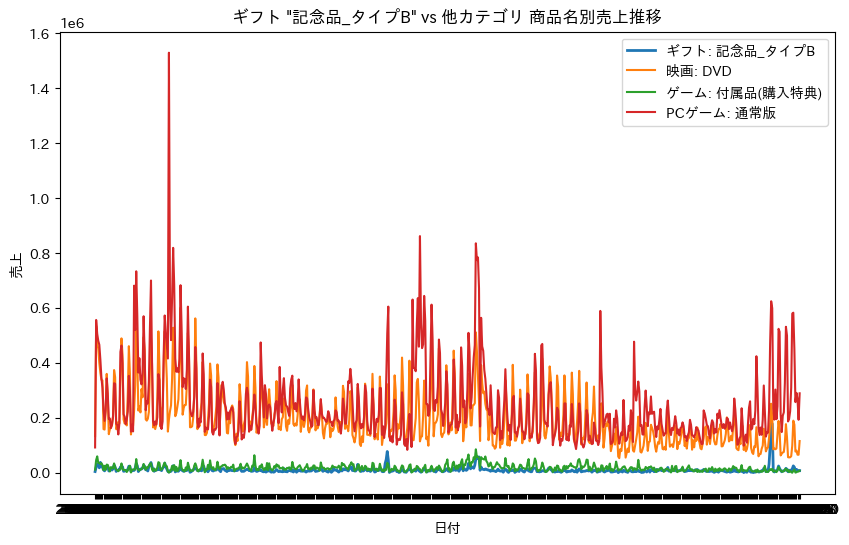

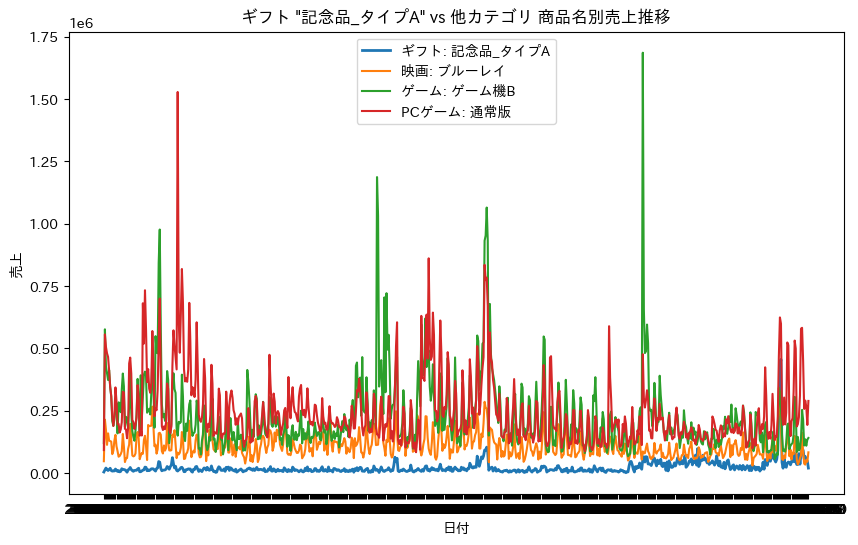

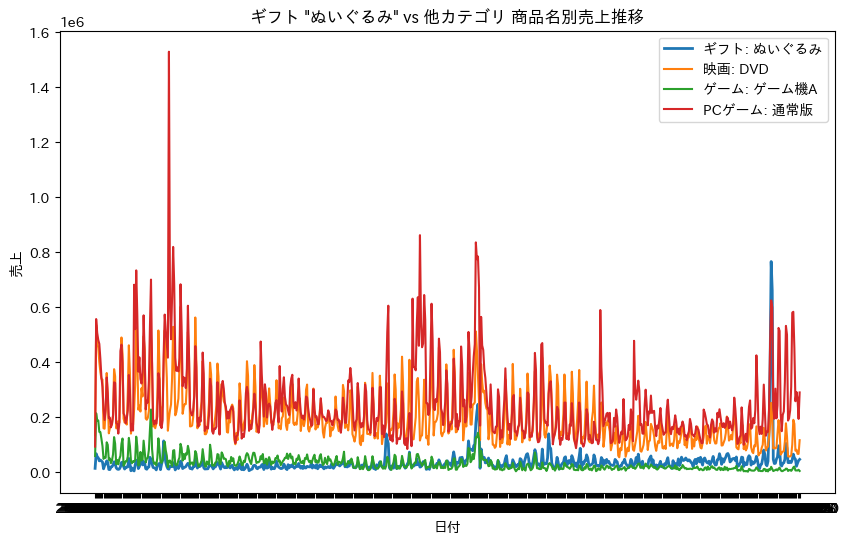

In [11]:
# 'ギフト'カテゴリ内の各商品名のリストを取得
gift_product_names = df[df['商品カテゴリ'] == 'ギフト']['商品名'].unique()

# 比較する他のカテゴリ
other_categories = ['映画', 'ゲーム', 'PCゲーム']

# ギフトカテゴリ内の各商品名と他のカテゴリの商品名の売上推移を比較
for gift_product in gift_product_names:
    # ギフトカテゴリ内の商品の売上推移
    gift_sales_trend = df[(df['商品カテゴリ'] == 'ギフト') & (df['商品名'] == gift_product)].groupby('日付')['売上'].sum()

    # グラフの作成
    plt.figure(figsize=(10, 6))
    plt.plot(gift_sales_trend, label=f'ギフト: {gift_product}', linewidth=2)

    # 他のカテゴリからランダムに1つの商品を選択して売上推移をプロット
    for category in other_categories:
        category_product_names = df[df['商品カテゴリ'] == category]['商品名'].unique()
        selected_product = random.choice(category_product_names)
        category_sales_trend = df[(df['商品カテゴリ'] == category) & (df['商品名'] == selected_product)].groupby('日付')['売上'].sum()
        plt.plot(category_sales_trend, label=f'{category}: {selected_product}')

    # タイトルとラベル
    plt.title(f'ギフト "{gift_product}" vs 他カテゴリ 商品名別売上推移')
    plt.xlabel('日付')
    plt.ylabel('売上')

    # 凡例
    plt.legend()

    # グラフの表示
    plt.show()


- ギフト--フィギュア--に絞ってplot

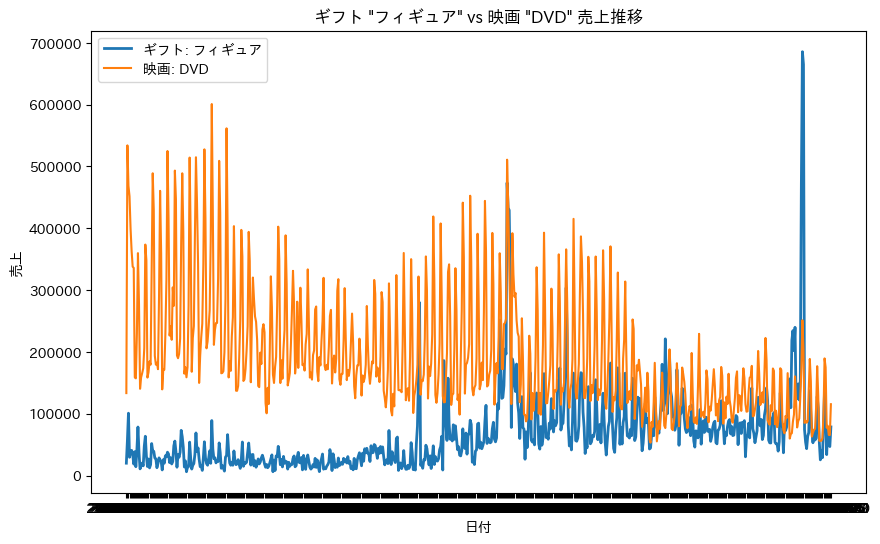

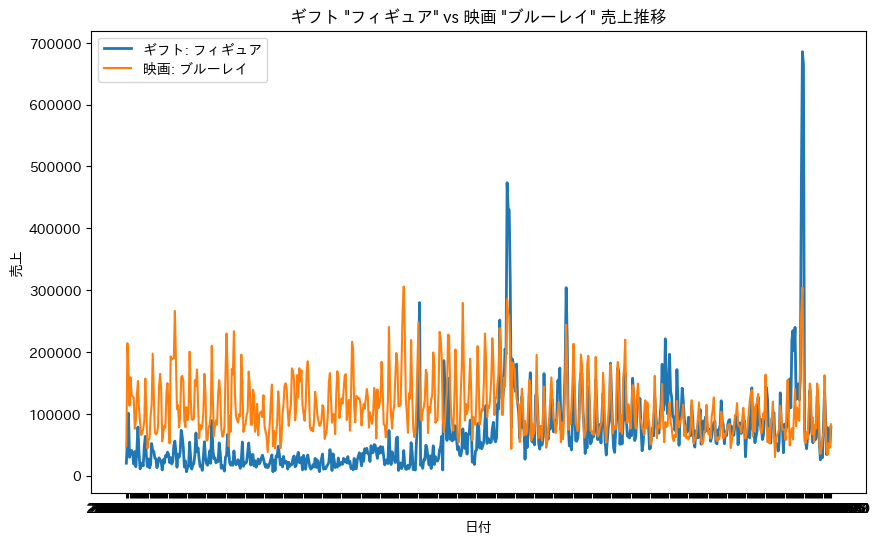

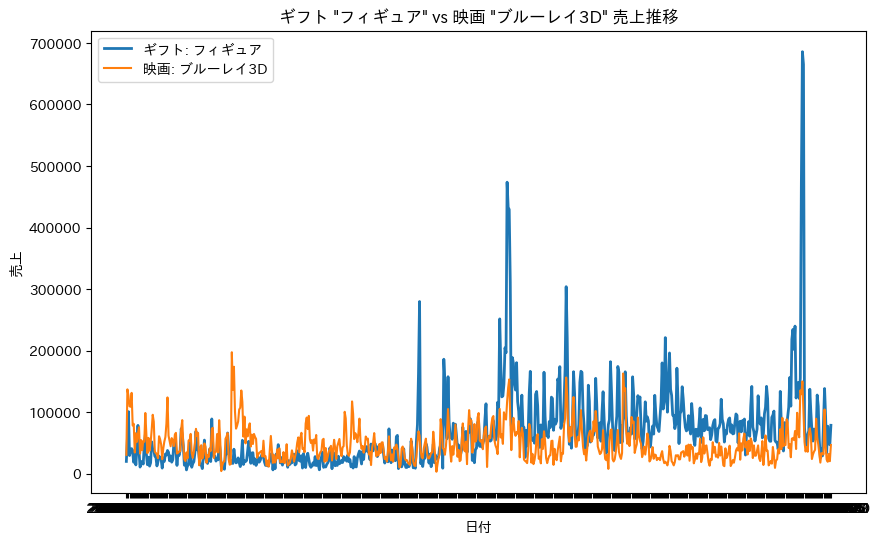

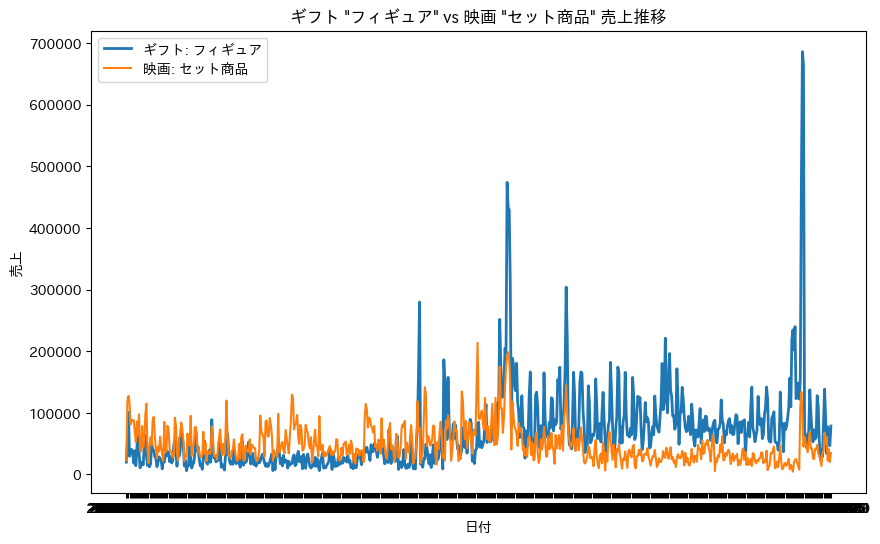

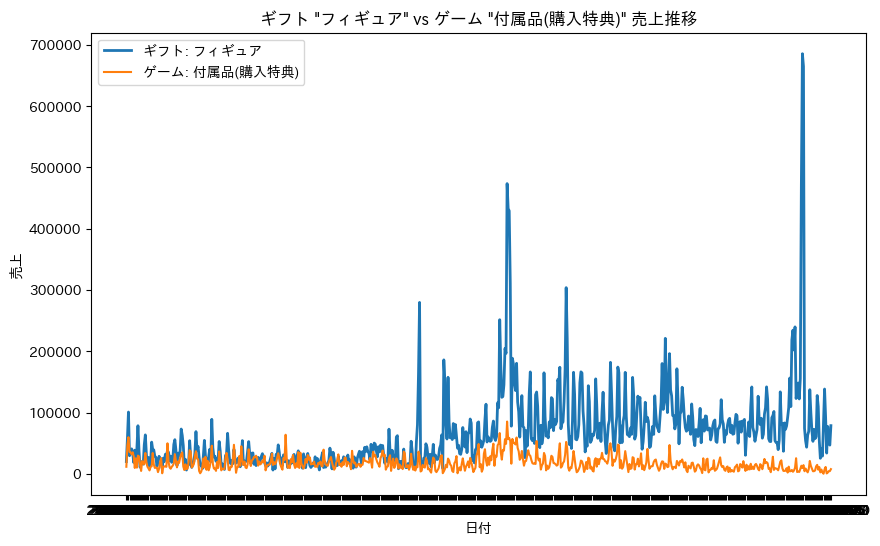

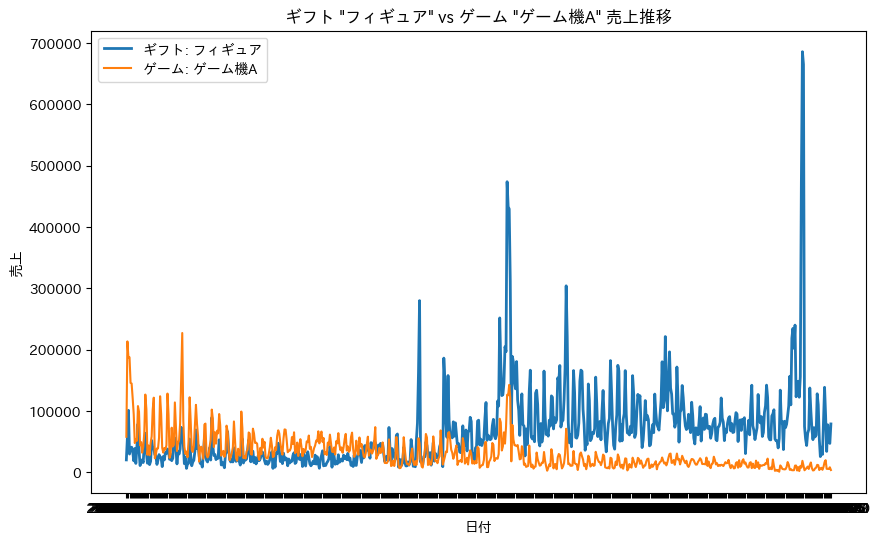

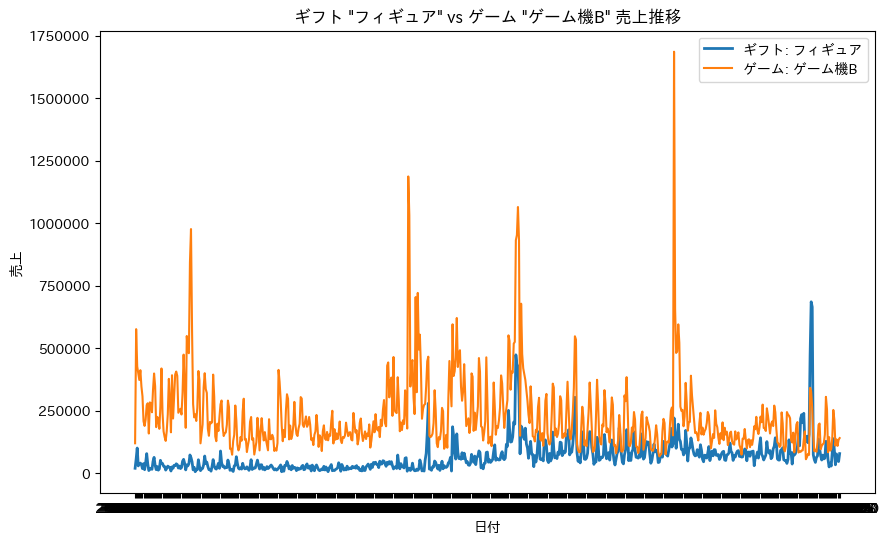

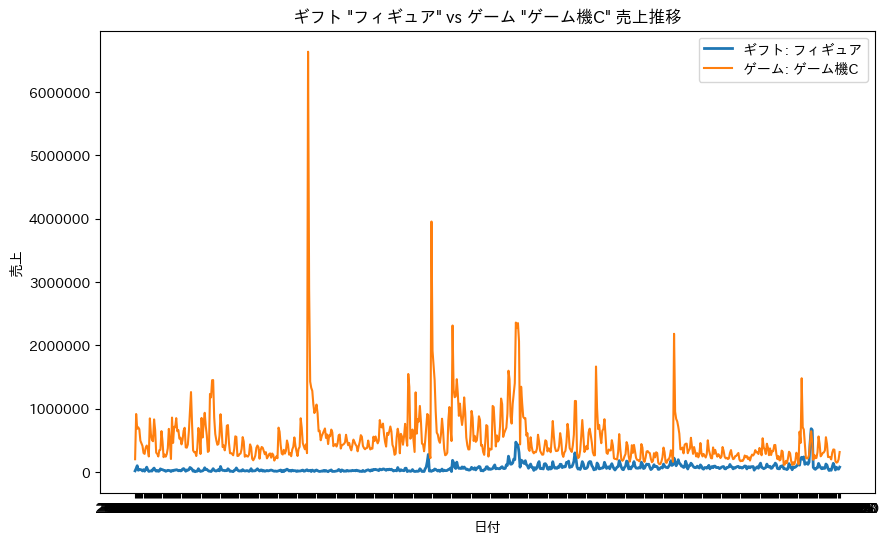

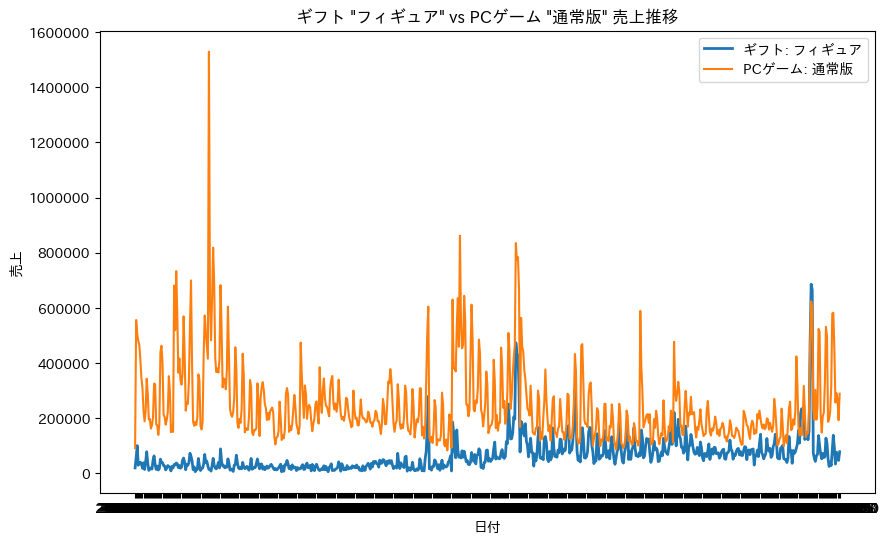

In [14]:
# 'ギフト'カテゴリ内の'フィギュア'商品の売上推移
gift_figure_sales_trend = df[(df['商品カテゴリ'] == 'ギフト') & (df['商品名'] == 'フィギュア')].groupby('日付')['売上'].sum()

# 比較する他のカテゴリ
other_categories = ['映画', 'ゲーム', 'PCゲーム']

# 各カテゴリの商品名ごとに売上推移をプロット
for category in other_categories:
    category_product_names = df[df['商品カテゴリ'] == category]['商品名'].unique()

    for product_name in category_product_names:
        category_sales_trend = df[(df['商品カテゴリ'] == category) & (df['商品名'] == product_name)].groupby('日付')['売上'].sum()

        plt.figure(figsize=(10, 6))
        plt.plot(gift_figure_sales_trend, label='ギフト: フィギュア', linewidth=2)
        plt.plot(category_sales_trend, label=f'{category}: {product_name}')

        # Y軸のラベルを通常の数値表記に変更
        plt.ticklabel_format(style='plain', axis='y')

        plt.title(f'ギフト "フィギュア" vs {category} "{product_name}" 売上推移')
        plt.xlabel('日付')
        plt.ylabel('売上')
        plt.legend()
        plt.show()


d
